In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D


In [141]:
df = pd.read_csv("/content/Dataset.csv", encoding="utf-8", on_bad_lines="skip")
df.head()

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
0,imagoai_corn_0,0.416181,0.396844,0.408985,0.372865,0.385293,0.365390,0.355226,0.343350,0.344837,...,0.710280,0.717482,0.715078,0.705379,0.696691,0.692793,0.711369,0.697679,0.704520,1100.0
1,imagoai_corn_1,0.415797,0.402956,0.402564,0.396014,0.397192,0.389634,0.375671,0.363689,0.373883,...,0.684011,0.697271,0.701995,0.696077,0.701012,0.677418,0.696921,0.696544,0.689054,1000.0
2,imagoai_corn_2,0.389023,0.371206,0.373098,0.373872,0.361056,0.349709,0.333882,0.330841,0.328925,...,0.683054,0.669286,0.663179,0.676165,0.676591,0.655951,0.658945,0.670989,0.665176,1300.0
3,imagoai_corn_3,0.468837,0.473255,0.462949,0.459335,0.461672,0.459824,0.458194,0.427737,0.415360,...,0.742782,0.730801,0.736787,0.730044,0.751437,0.738497,0.742446,0.754657,0.733474,1300.0
4,imagoai_corn_4,0.483352,0.487274,0.469153,0.487648,0.464026,0.451152,0.458229,0.440782,0.426193,...,0.770227,0.773013,0.761431,0.763488,0.762473,0.744012,0.775486,0.760431,0.751988,220.0


In [142]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 861.5+ KB
None


In [143]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
hsi_id           0
0                0
1                0
2                0
3                0
                ..
444              1
445              1
446              1
447              1
vomitoxin_ppb    1
Length: 450, dtype: int64


In [144]:
df_summary = df.describe()
df_summary

,0,1,2,3,4,5,6,7,8,9,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
count,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,245.000000,...,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,0.439040,0.436877,0.429557,0.421480,0.414054,0.407525,0.401539,0.396044,0.389425,0.385168,...,0.739361,0.738131,0.738085,0.736797,0.737430,0.735898,0.735484,0.735839,0.735674,4333.426230
std,0.045015,0.045931,0.046736,0.045941,0.046938,0.045519,0.045809,0.044538,0.045128,0.044384,...,0.056163,0.055977,0.055682,0.055335,0.055574,0.055398,0.056080,0.056401,0.057096,16090.574998
min,0.311182,0.295321,0.284064,0.282054,0.296702,0.286860,0.262876,0.278523,0.255529,0.261459,...,0.562662,0.585011,0.558412,0.571735,0.575259,0.573276,0.577803,0.576985,0.562302,0.000000
25%,0.409716,0.399796,0.394759,0.385645,0.377607,0.372131,0.368601,0.365017,0.356278,0.351790,...,0.701667,0.701062,0.702945,0.700238,0.700776,0.700624,0.698497,0.698067,0.695412,195.000000
50%,0.438970,0.434481,0.425001,0.417551,0.408682,0.402955,0.395894,0.389582,0.386586,0.381113,...,0.742052,0.735813,0.738798,0.738611,0.735212,0.738521,0.740167,0.737853,0.737099,500.000000
75%,0.475414,0.473255,0.473066,0.461361,0.453889,0.449034,0.444316,0.434214,0.426636,0.422430,...,0.776845,0.775267,0.774953,0.771768,0.774245,0.774290,0.775116,0.773634,0.774140,1900.000000
max,0.530580,0.524587,0.521675,0.513318,0.511909,0.501786,0.504054,0.490692,0.489272,0.472080,...,0.940642,0.940361,0.939153,0.930366,0.942615,0.945225,0.932812,0.931381,0.957860,131000.000000


In [145]:
print("\nDuplicate Values:")
print(df.duplicated().sum())


Duplicate Values:
0


In [146]:
# Handle missing values (fill with mean or drop)
df = df.dropna()

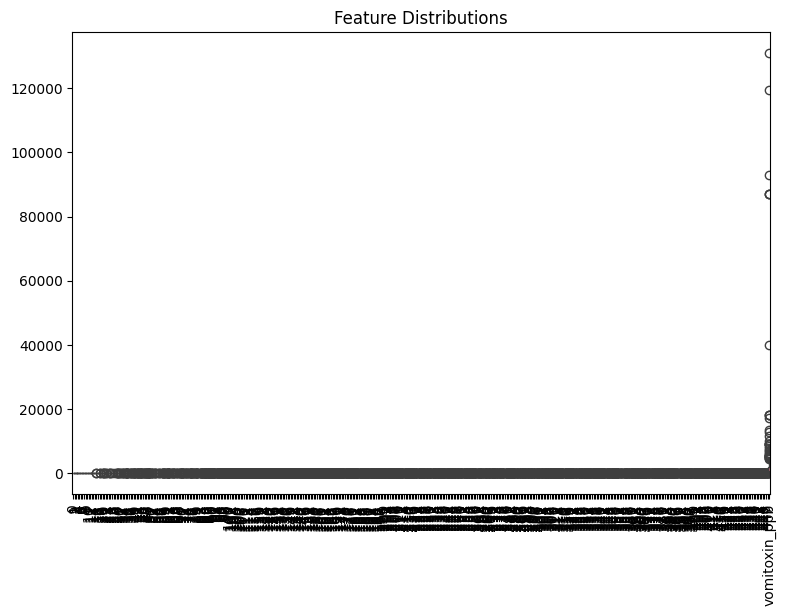

In [147]:
# Visualize distribution of features
plt.figure(figsize=(9, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Feature Distributions")
plt.show()

In [148]:
# Drop ID column for numerical analysis
spectral_data = df.iloc[:, 1:-1]

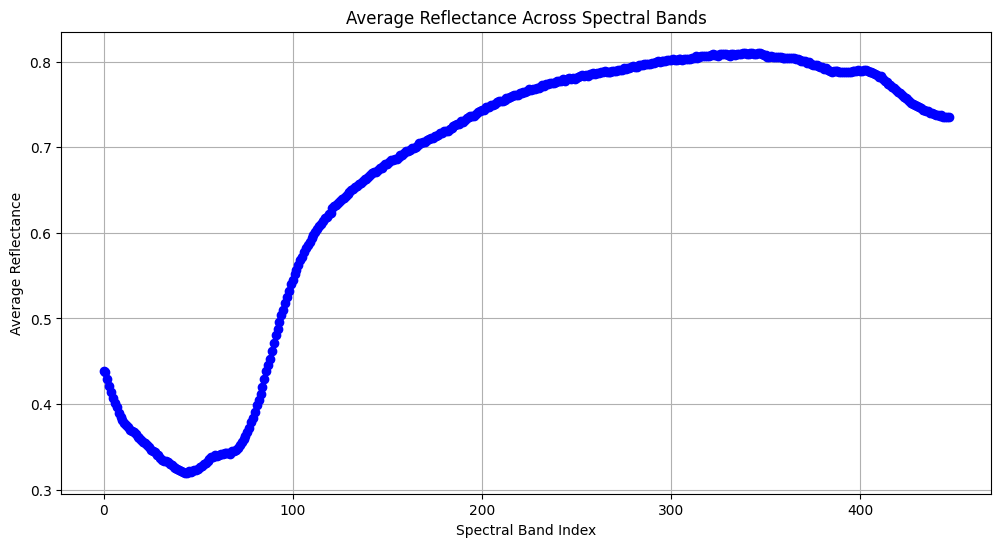

In [149]:
### --- 1. LINE PLOT (Average Reflectance Per Band) --- ###
plt.figure(figsize=(12, 6))
plt.plot(range(spectral_data.shape[1]), spectral_data.mean(), marker='o', linestyle='-', color='b')
plt.xlabel("Spectral Band Index")
plt.ylabel("Average Reflectance")
plt.title("Average Reflectance Across Spectral Bands")
plt.grid(True)
plt.show()

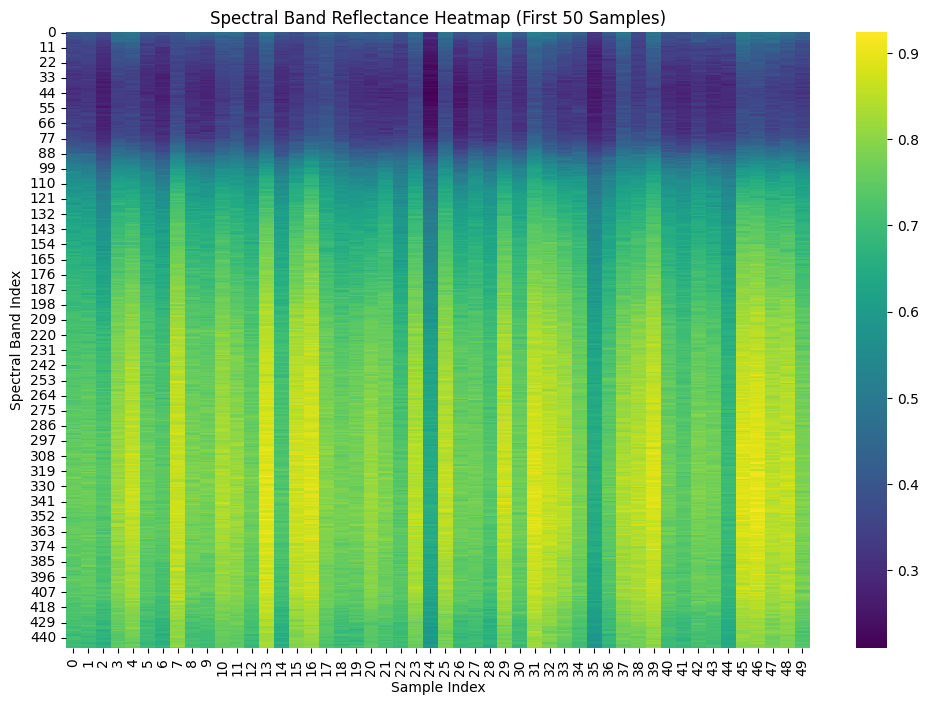

In [150]:
### --- 2. HEATMAP (Sample Comparisons) --- ###
plt.figure(figsize=(12, 8))
sns.heatmap(spectral_data.iloc[:50, :].T, cmap="viridis", cbar=True)  # First 50 samples for clarity
plt.xlabel("Sample Index")
plt.ylabel("Spectral Band Index")
plt.title("Spectral Band Reflectance Heatmap (First 50 Samples)")
plt.show()

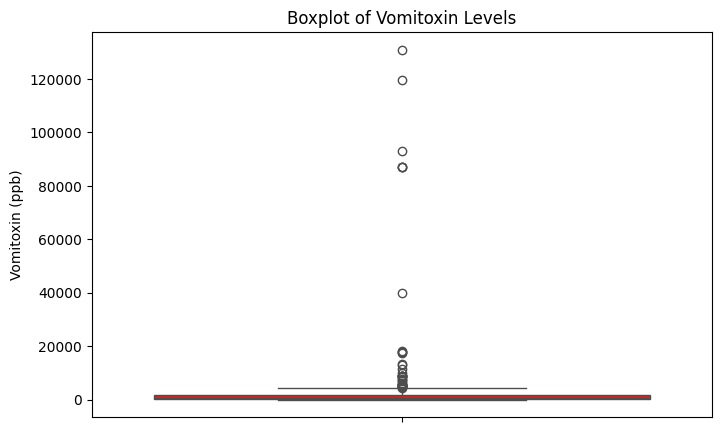

In [151]:
# Boxplot for vomitoxin_ppb
plt.figure(figsize=(8, 5))
sns.boxplot(y=df["vomitoxin_ppb"], color="red")
plt.title("Boxplot of Vomitoxin Levels")
plt.ylabel("Vomitoxin (ppb)")
plt.show()

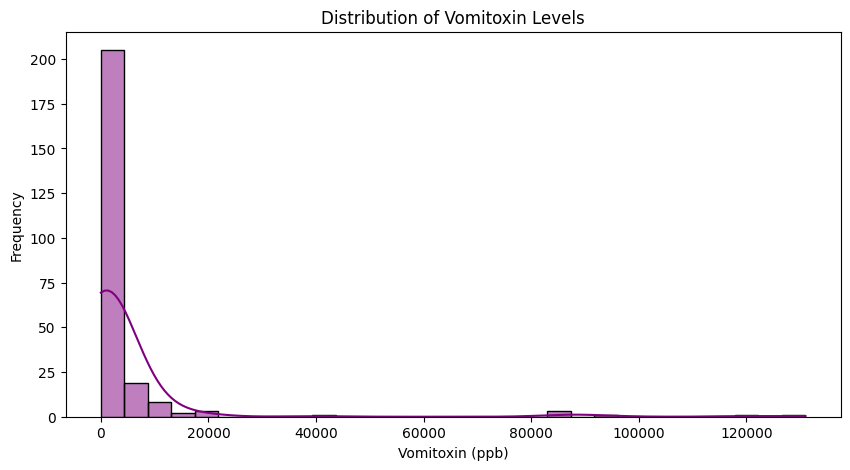

In [152]:
# Histogram for vomitoxin_ppb
plt.figure(figsize=(10, 5))
sns.histplot(df["vomitoxin_ppb"], bins=30, kde=True, color="purple")
plt.title("Distribution of Vomitoxin Levels")
plt.xlabel("Vomitoxin (ppb)")
plt.ylabel("Frequency")
plt.show()

In [153]:
# Normalize spectral data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.iloc[:, 1:]), columns=df.columns[1:])

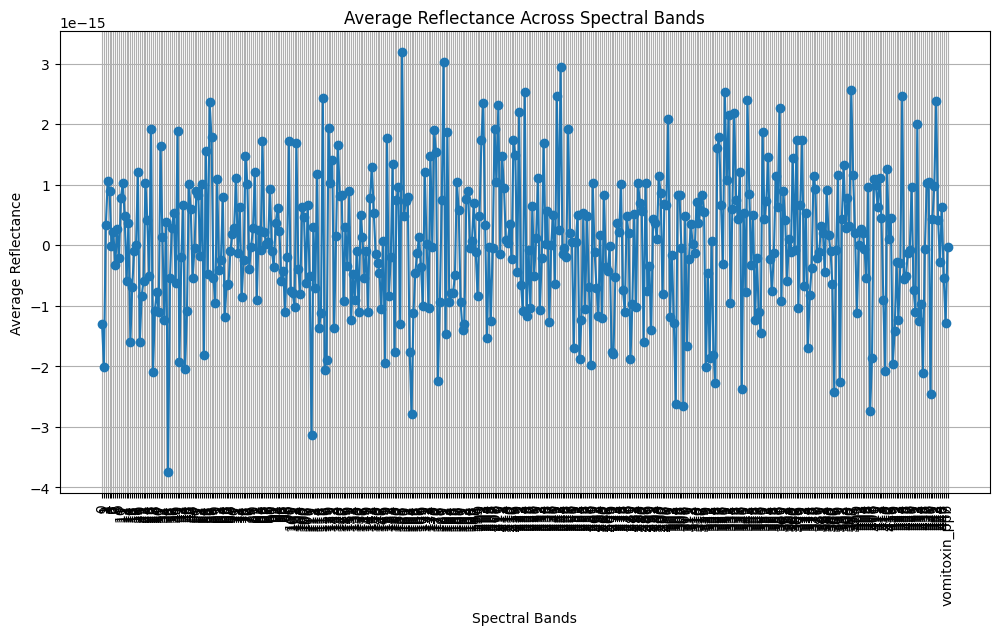

In [154]:
# Line Plot - Average Reflectance per Band
plt.figure(figsize=(12, 6))
plt.plot(df_scaled.mean(), marker='o', linestyle='-')
plt.xlabel("Spectral Bands")
plt.ylabel("Average Reflectance")
plt.title("Average Reflectance Across Spectral Bands")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [155]:
# PCA for Dimensionality Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_scaled)
print("\nExplained Variance by PCA Components:", pca.explained_variance_ratio_)


Explained Variance by PCA Components: [0.87512296 0.05523558]


In [156]:
# PCA (2 Components)
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_scaled)
explained_var = pca.explained_variance_ratio_
print("\nExplained Variance by PCA Components:", explained_var)


Explained Variance by PCA Components: [0.87512296 0.05523558 0.02225953]


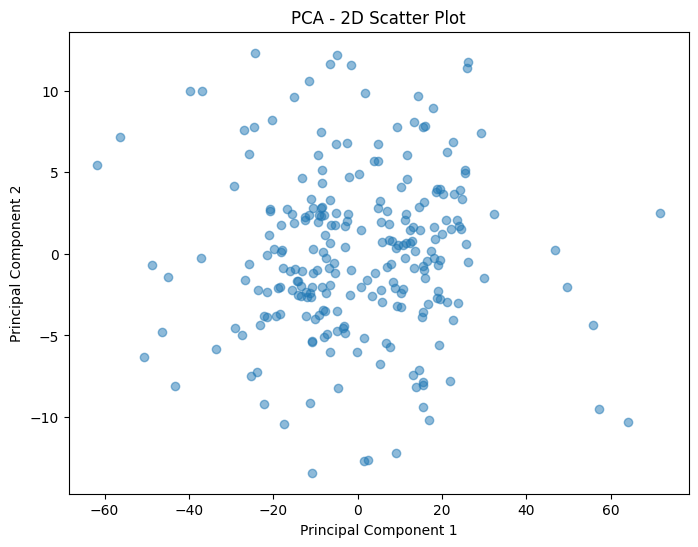

In [157]:
# 2D Scatter Plot - PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA - 2D Scatter Plot")
plt.show()

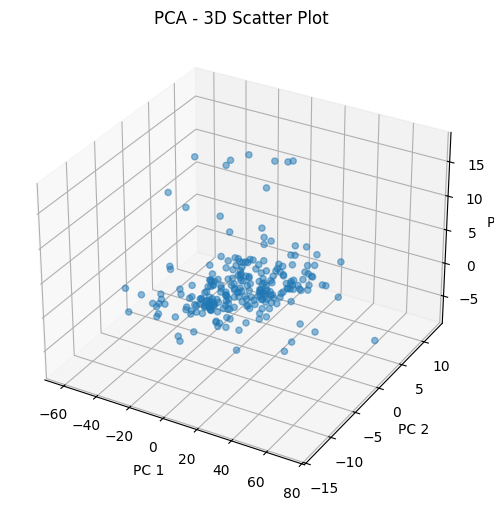

In [158]:
# 3D Scatter Plot - PCA
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], alpha=0.5)
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.set_title("PCA - 3D Scatter Plot")
plt.show()

In [159]:
# t-SNE for visualization
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(df_scaled)

In [160]:
# t-SNE (2 Components)
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(df_scaled)

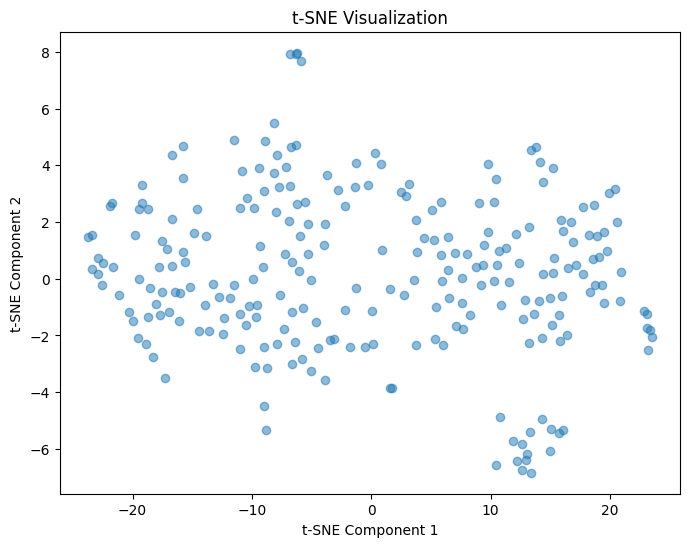

In [161]:
# Visualize t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_result[:, 0], tsne_result[:, 1], alpha=0.5)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization")
plt.show()

In [162]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [163]:
# Extract features (Exclude ID & Target column)
X = df.iloc[:, 1:-1].values  # Spectral Data
y = df["vomitoxin_ppb"].values  # Target Variable

In [164]:
# Log-transform the target to reduce skewness
y = np.log1p(y)

In [165]:
# Normalize spectral data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 93ms/step - loss: 63545024.0000 - mae: 2381.1106 - val_loss: 794520768.0000 - val_mae: 7637.1313
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 234631424.0000 - mae: 4424.3555 - val_loss: 770549440.0000 - val_mae: 8010.5312
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - loss: 153845312.0000 - mae: 3936.6836 - val_loss: 741407424.0000 - val_mae: 8663.2725
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - loss: 89159384.0000 - mae: 3840.9780 - val_loss: 708122304.0000 - val_mae: 9566.8105
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 124728056.0000 - mae: 4278.1719 - val_loss: 734058304.0000 - val_mae: 8385.2744
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - loss: 213369616.0000 - mae: 5210.8140 - val_loss: 711133312.0000 - val_mae: 9056.5078
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 135833872.0000 - mae: 4406.3164 - val_loss: 702327424.0000 - val_mae: 8849.8193
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 1

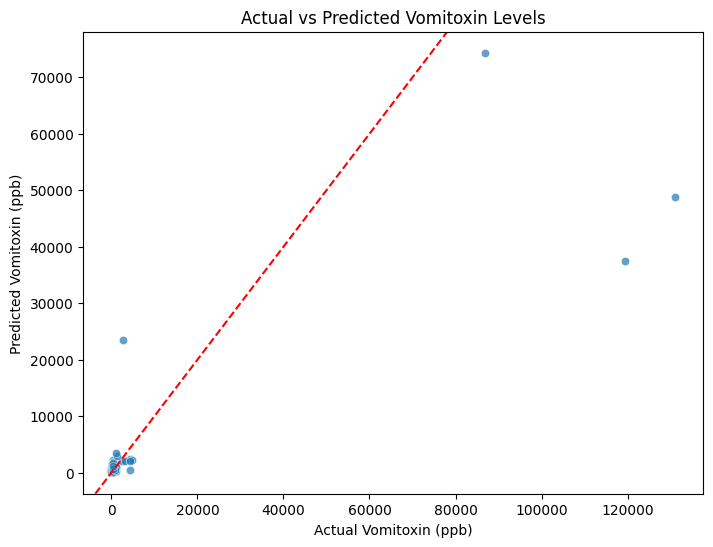

In [166]:
# Drop non-numeric columns (if any)
df = df.select_dtypes(include=[np.number])

# Separate features and target
X = df.iloc[:, :-1].values  # All spectral bands
y = df.iloc[:, -1].values   # Target (vomitoxin_ppb)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for CNN (Conv1D needs 3D input: samples, time steps, channels)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define CNN Model
model = keras.Sequential([
    layers.Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(filters=128, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),

    # Output layer for regression
    layers.Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"📌 Test Mean Absolute Error (MAE): {mae:.2f}")

# Predictions
y_pred = model.predict(X_test).flatten()


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("Actual vs Predicted Vomitoxin Levels")
plt.axline((0, 0), slope=1, color='red', linestyle='dashed')
plt.show()


In [167]:
# Drop non-numeric columns (if any)
df = df.select_dtypes(include=[np.number])

# Reshape for CNN (Conv1D needs 3D input: samples, time steps, channels)
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define Fine-Tuned CNN Model
model = keras.Sequential([
    layers.Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(X_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.25),

    layers.Conv1D(filters=256, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.25),

    layers.Conv1D(filters=512, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),

    # Output layer for regression
    layers.Dense(1)
])

# Compile model with learning rate scheduler
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

# Callbacks for fine-tuning
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1),
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
]

# Train the model (Fine-Tuned)
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test),
                    verbose=1, callbacks=callbacks)



Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 358ms/step - loss: 125579448.0000 - mae: 3126.8071 - val_loss: 760291008.0000 - val_mae: 7988.7144 - learning_rate: 0.0010
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 258ms/step - loss: 85664736.0000 - mae: 3000.1880 - val_loss: 712886784.0000 - val_mae: 9275.6562 - learning_rate: 0.0010
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - loss: 131810808.0000 - mae: 4590.8032 - val_loss: 721118208.0000 - val_mae: 8467.5771 - learning_rate: 0.0010
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 293ms/step - loss: 173173424.0000 - mae: 4642.4072 - val_loss: 694609472.0000 - val_mae: 8506.1611 - learning_rate: 0.0010
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 247ms/step - loss: 111304824.0000 - mae: 3760.9395 - val_loss: 646582784.0000 - val_mae: 8002.1797 - learning_rate: 0.0010
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 265ms/step - loss: 150953856.0000 - mae: 4917.3833 - val_loss: 600719168.0000 - val_mae: 6824.6768 - learning_rate: 0.0010
Epoch 7/100
13/13 ━━━━━

In [168]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"📌 Fine-Tuned Test Mean Absolute Error (MAE): {mae:.2f}")
# Predictions
y_pred = model.predict(X_test).flatten()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 236452960.0000 - mae: 5073.4155
📌 Fine-Tuned Test Mean Absolute Error (MAE): 4542.53
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


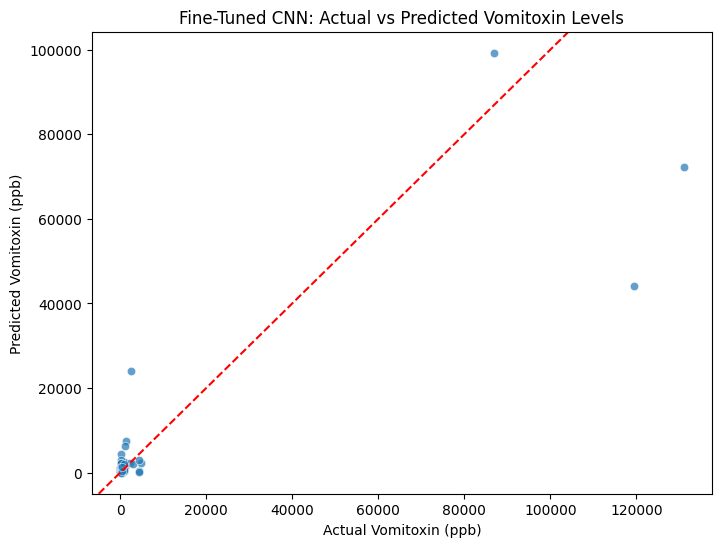

In [169]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual Vomitoxin (ppb)")
plt.ylabel("Predicted Vomitoxin (ppb)")
plt.title("Fine-Tuned CNN: Actual vs Predicted Vomitoxin Levels")
plt.axline((0, 0), slope=1, color='red', linestyle='dashed')
plt.show()

In [170]:
# Compute Regression Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"📌 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📌 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"📌 R² Score: {r2:.4f}")

📌 Mean Absolute Error (MAE): 4542.53
📌 Root Mean Squared Error (RMSE): 14203.61
📌 R² Score: 0.7266


In [175]:
# Save the trained model
model.save('cnn_model.h5')
print("✅ CNN model saved as 'cnn_model.h5'")

✅ CNN model saved as 'cnn_model.h5'


In [171]:
from tensorflow.keras.layers import Layer, Dense, Flatten, Conv1D, MaxPooling1D, Dropout, Multiply
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras import backend as K
import tensorflow as tf

# Attention Layer
class Attention(Layer):
    def __init__(self):
        super(Attention, self).__init__()

    def build(self, input_shape):
        self.W = self.add_weight(name="attention_weight", shape=(input_shape[-1], 1), initializer="normal", trainable=True)
        self.b = self.add_weight(name="attention_bias", shape=(input_shape[1], 1), initializer="zeros", trainable=True)
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        return K.sum(output, axis=1)

# CNN + Attention Model
input_shape = (X_train.shape[1], 1)
model = Sequential([
    Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=input_shape),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=256, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Conv1D(filters=512, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Dropout(0.3),

    Attention(),  # <-- Added Attention Layer

    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),

    # Output layer for regression
    Dense(1)
])

# Compile and Train
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 198ms/step - loss: 287513024.0000 - mae: 5023.4717 - val_loss: 796969856.0000 - val_mae: 7721.9565
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - loss: 159819696.0000 - mae: 3593.5552 - val_loss: 767361664.0000 - val_mae: 7935.3257
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - loss: 87533400.0000 - mae: 3503.9932 - val_loss: 727859456.0000 - val_mae: 8947.4326
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 254ms/step - loss: 147565872.0000 - mae: 5202.3208 - val_loss: 729870272.0000 - val_mae: 8663.4355
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 215ms/step - loss: 76579392.0000 - mae: 3552.5486 - val_loss: 751654976.0000 - val_mae: 8084.5620
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 166ms/step - loss: 92122496.0000 - mae: 3587.8525 - val_loss: 730432320.0000 - val_mae: 8938.0840
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 166ms/step - loss: 89728408.0000 - mae: 4047.1978 - val_loss: 717893696.0000 - val_mae: 9301.4102
Epoch 8/100
13/13

In [172]:
from tensorflow.keras.layers import MultiHeadAttention, LayerNormalization, Dropout, Dense, Input
from tensorflow.keras.models import Model

# Transformer Block
def transformer_block(inputs, head_size, num_heads, ff_dim, dropout=0.3):
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads)(inputs, inputs)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    x = Dense(ff_dim, activation="relu")(res)
    x = Dropout(dropout)(x)
    x = LayerNormalization(epsilon=1e-6)(x)
    return x + res

# Input Layer
input_shape = (X_train.shape[1], 1)
inputs = Input(shape=input_shape)
x = transformer_block(inputs, head_size=64, num_heads=4, ff_dim=128)
x = transformer_block(x, head_size=64, num_heads=4, ff_dim=128)

# Flatten and Dense Layers
x = Flatten()(x)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
outputs = Dense(1)(x)

# Create and Compile Model
model = Model(inputs, outputs)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mse", metrics=["mae"])

# Train the Transformer Model
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test), verbose=1)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - loss: 111669424.0000 - mae: 3111.1758 - val_loss: 734018048.0000 - val_mae: 9153.5195
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - loss: 55500840.0000 - mae: 3396.0605 - val_loss: 697859584.0000 - val_mae: 10120.4736
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - loss: 100698192.0000 - mae: 3862.8059 - val_loss: 665287424.0000 - val_mae: 9166.4180
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - loss: 137243616.0000 - mae: 4955.7422 - val_loss: 606780928.0000 - val_mae: 7985.7935
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - loss: 76091552.0000 - mae: 3462.8218 - val_loss: 528162496.0000 - val_mae: 8363.4307
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 22s 1s/step - loss: 86293384.0000 - mae: 3876.5173 - val_loss: 538170304.0000 - val_mae: 7067.3652
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 19s 1s/step - loss: 73894600.0000 - mae: 3072.2974 - val_loss: 498256128.0000 - val_mae: 6774.1562
Epoch 8/100
13/13 ━━━━━━━━━━━━

In [173]:
pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 94.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.8 MB/s eta 0:00:00


In [176]:
import streamlit as st
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler

# Load Pretrained Model
model = load_model('cnn_model.h5')

# Streamlit UI
st.title("Vomitoxin Prediction from Spectral Data 🌾")
uploaded_file = st.file_uploader("Upload CSV File", type="csv")

if uploaded_file:
    data = pd.read_csv(uploaded_file)
    st.write(data.head())

    # Preprocess data
    scaler = StandardScaler()
    X = scaler.fit_transform(data.values)
    X = X.reshape((X.shape[0], X.shape[1], 1))

    # Predict
    predictions = model.predict(X)
    data['Predicted Vomitoxin (ppb)'] = predictions

    st.write("### Predicted Values:")
    st.write(data)

    # Scatter Plot
    st.write("### Actual vs Predicted Scatter Plot")
    import matplotlib.pyplot as plt
    import seaborn as sns

    fig, ax = plt.subplots()
    sns.scatterplot(x=data.index, y=data['Predicted Vomitoxin (ppb)'], label='Predicted')
    plt.xlabel("Sample")
    plt.ylabel("Predicted Vomitoxin (ppb)")
    st.pyplot(fig)

    # Download Results
    st.download_button(
        label="Download Predictions",
        data=data.to_csv(index=False),
        file_name="predictions.csv",
        mime="text/csv"
    )


TypeError: too many positional arguments